In [1]:
import pandas as pd
import numpy as np
import os
import parsing as pars
import preprocessing_segmentation as pg
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

mentari_path = '/Users/ASUS/Documents/Python Scripts/'
rizal_path = '/Users/Rizal Maulana/Downloads/semester 7/PKL/datas/'
fauzan_path = '/Users/fauzanrahman/Downloads/Coding/pkl/'

# Parsing .txt into .feather

In [2]:
# traintypes = {'indi_apps_201904.user_id': 'object',
#               'indi_apps_201904.category_name': 'object', 
#               'indi_apps_201904.application_name': 'object',
#               'indi_apps_201904.activity_sec': 'float64',
#               'indi_apps_201904.volume_in': 'float64',
#               'indi_apps_201904.volume_out': 'float64',
#               'indi_apps_201904.ds': 'object'}

# path_in = [rizal_path+i for i in os.listdir(rizal_path) if i.endswith('.txt')]
# path_out = [i.split('.')[0]+'.feather' for i in path_in]

In [3]:
# pr = pars.Parsing(traintypes,chunksize=5000000)
# pr.text_to_feather(path_in=path_in,path_out=path_out,sep=';')

# Read data

In [4]:
list_file = [rizal_path+i for i in os.listdir(rizal_path) if i.endswith('.feather')]
list_file

['/Users/Rizal Maulana/Downloads/semester 7/PKL/datas/data_indihome_app_20190401.feather',
 '/Users/Rizal Maulana/Downloads/semester 7/PKL/datas/data_indihome_app_20190402.feather',
 '/Users/Rizal Maulana/Downloads/semester 7/PKL/datas/data_indihome_app_20190403.feather',
 '/Users/Rizal Maulana/Downloads/semester 7/PKL/datas/data_indihome_app_20190404.feather']

# Analysis data

In [5]:
segment = pg.Segmentation(limit=500000)
df = pd.read_feather(list_file[0])

In [6]:
print('Users : {:,}'.format(len(np.unique(df['indi_apps_201904.user_id']))))
print('Length of unique columns application name : {:,}'.format(len(np.unique(df['indi_apps_201904.application_name']))))
print('Length of unique columns category name : {:,}'.format(len(np.unique(df['indi_apps_201904.category_name']))))

Users : 74,452
Length of unique columns application name : 8,355
Length of unique columns category name : 64


In [7]:
print('Top value by application name :')
segment.load_top(df,name='app',top_number=100)

Top value by application name :


Index(['GoogleServices', 'GooglePortalDetection', 'Facebook', 'WhatsApp',
       'AdvertisingSites', 'YouTube', 'GooglePush', 'GooglePlayServices',
       'DoubleClick', 'TelcoSites', 'TrackerSites', 'synonly', 'Instagram',
       'DeviceServicesSites', 'Oppo', 'MIUIServices', 'SoftwareDownloadsSites',
       'ProxySites', 'TouchPal', 'HostingSites', 'MiTalk', 'UZone',
       'Crashlytics', 'HTTP', 'AppsFlyer', 'GoogleSafeBrowsing', 'SSL',
       'TechnologySites', 'GoogleMaps', 'ProxyAvoidanceSites', 'Avast',
       'XiaomiMarket', 'unclassified', 'LINE', 'TelkomMercusuar', 'Akamai',
       'MessagingSites', 'InMobi', 'QQ', 'Vivo', 'CleanMaster',
       'GoogleTagManager', 'ByteDance', 'Gmail', 'GoogleInbox',
       'CheetahMobile', 'non-established', 'Shopee', 'WebApplicationSites',
       'Baidu', 'MoPub', 'SocialNewsSites', 'Adjust', 'SecuritySites', 'UCWeb',
       'WeChat', 'SamsungApps', 'CorporateSites', 'DNS', 'TikTok',
       'AccuWeather', 'GoogleContacts', 'Twitter', 'MiClo

In [8]:
print('Top value by category name :')
segment.load_top(df,name='cat')

Top value by category name :


Index(['Ads', 'DeviceServices', 'Communications', 'SocialNet', 'CDN', 'Video',
       'Games', 'GoogleServices', 'Technology', 'Web', 'Tracker', 'Net',
       'Security', 'Proxy', 'Productivity', 'ApplicationStore', 'Lifestyle',
       'Telco', 'unclassified', 'eCommerce', 'LocationServices', 'News',
       'Mail', 'SearchEngine', 'Enterprise', 'AppleServices', 'Attack',
       'WebApps', 'Media', 'CloudStorage', 'Update', 'CloudServices', 'Images',
       'Weather', 'Music', 'Finance', 'non-established', 'Backup',
       'Transportation', 'Education', 'YahooServices', 'VPN', 'FileSharing',
       'Content', 'RPC', 'Travel', 'P2P', 'File', 'Sports', 'Gov', 'Banking',
       'IPCamera', 'Religion', 'DlMgr', 'Remote', 'Automotive', 'FoodDrinks',
       'JobSearch', 'RealEstate', 'HomeDecoration', 'MDM', 'Sync', 'Misc',
       'Browser'],
      dtype='object')

# Filtering

In [9]:
list_del_cat = ['Ads','Attack','CloudStorage','Content','MDM','Misc','Proxy','Remote','Sync',
                'Tracker','Update','Weather','non-established','unclassified','Browser','DeviceServices',
                'File','FileSharing','GoogleServices','Media','RPC','Security','VPN']
list_del_app = ['GooglePortalDetection','TouchPal','CleanMaster','BBM-UCI', 'AdultSites','SinaCN']

# Preprocessing

In [10]:
print('Total datas : {}\n'.format(len(list_file)))
timeseries = segment.preprocessing(list_file,top_number=100,limit_pca=60,
                                   filter_cat=list_del_cat,filter_app=list_del_app)
df_ = segment.df_preprocess

Total datas : 4

Load data 1....
Finish load data 1
Finish filtering data 1
Finish normalization data 1
Percentage of variance : 0.9252991803591116
Finish PCA data 1
Finish preprocessing data 1
Load data 2....
Finish load data 2
Finish filtering data 2
Finish normalization data 2
Percentage of variance : 0.9270872596272146
Finish PCA data 2
Finish preprocessing data 2
Load data 3....
Finish load data 3
Finish filtering data 3
Finish normalization data 3
Percentage of variance : 0.9256450228191488
Finish PCA data 3
Finish preprocessing data 3
Load data 4....
Finish load data 4
Finish filtering data 4
Finish normalization data 4
Percentage of variance : 0.9246049278925635
Finish PCA data 4
Finish preprocessing data 4


# Optimal K-means

In [11]:
def optimal(df,awal,akhir,sample):
    eval_,cluster = [],[]
    for i in range(awal,akhir):
        labels = KMeans(n_clusters=i).fit_predict(df)
        sil = round(silhouette_score(df, labels, sample_size=sample), 3)
        eval_.append(sil)
        cluster.append(i)
        print('{} Cluster, Silhouette Score {}'.format(i,sil))
        
    return eval_,cluster

tm = pd.concat(timeseries)
tm.index = range(len(tm))

# Evaluation

## Silhouette Score

2 Cluster, Silhouette Score 0.137
3 Cluster, Silhouette Score 0.205
4 Cluster, Silhouette Score 0.246
5 Cluster, Silhouette Score 0.277
6 Cluster, Silhouette Score 0.269
7 Cluster, Silhouette Score 0.304
8 Cluster, Silhouette Score 0.327
9 Cluster, Silhouette Score 0.341


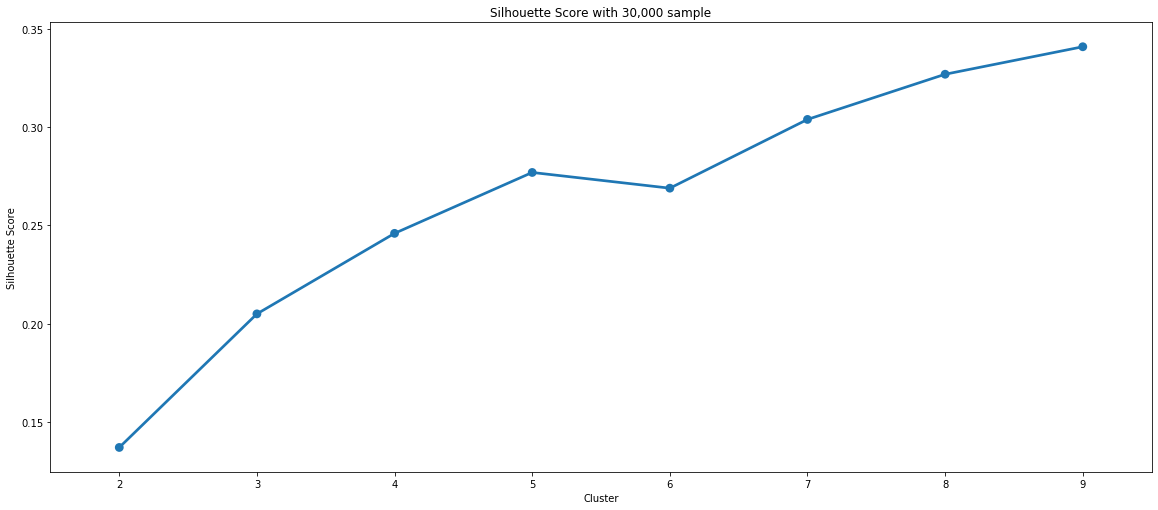

In [37]:
sample = 10000
ss,cluster = optimal(tm,2,10,sample)
plt.figure(figsize=(16,7))
sns.pointplot(x=cluster, y=ss)
plt.title('Silhouette Score with {:,} sample'.format(sample))
plt.tight_layout()
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.show()

# KMeans

In [13]:
df_tm = pd.concat(df_)
labels = KMeans(n_clusters=7).fit_predict(tm)
df_tm['Cluster'] = labels
df_tm

KeyboardInterrupt: 

# Group by Cluster

In [ ]:
df_cluster = df_tm.groupby('Cluster')
df_cluster.get_group(1)

# Summary every Segment

In [44]:
for i in np.unique(labels):
    print('Cluster {}'.format(i))
    print('Unique category name : {}'.format(list(np.unique(df_cluster.get_group(i)['indi_apps_201904.category_name']))))
    print('Unique application name : {}\n'.format(
        list(np.unique(df_cluster.get_group(i)['indi_apps_201904.application_name']))))

Cluster 0
Unique category name : ['Mail', 'Net', 'Technology']
Unique application name : ['AMPProject', 'AlibabaGroup', 'ByteDance', 'DNS', 'Disqus', 'Gmail', 'GoogleInbox', 'L3-ICMP', 'NTP', 'OCSP', 'OperaSoftware', 'QUIC', 'TechnologySites', 'Vivo', 'YahooMail']

Cluster 1
Unique category name : ['SocialNet']
Unique application name : ['Bigo', 'Blogger', 'Facebook', 'Instagram', 'Twitter', 'WordPress', 'YY']

Cluster 2
Unique category name : ['Communications']
Unique application name : ['GoIM', 'GoogleContacts', 'LINE', 'MessagingSites', 'MiTalk', 'QQ', 'STUN', 'Skype', 'Telegram', 'WeChat', 'WhatsApp', 'XMPP']

Cluster 3
Unique category name : ['Video']
Unique application name : ['StreamingVideoSites', 'TikTok', 'VidMate', 'VigoVideo', 'Viu', 'YouTube']

Cluster 4
Unique category name : ['AppleServices', 'ApplicationStore', 'Backup', 'CDN', 'CloudServices', 'Enterprise', 'Games', 'Images', 'Lifestyle', 'LocationServices', 'Music', 'News', 'Productivity', 'SearchEngine', 'Technology'

# Documentations